In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Instructions

1.Import the necessary libraries.

2.Load the customer_value_analysis.csv into the variable customer_df.

3.First look at its main features (head, shape, info).

4.Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

5.Change the type of effective_to_date column to DateTime format.

6.Check NaN values per column.

7.Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

8. Drop any ID column.

9.Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

13.According to the previous histogram plots, do you think that you will have to apply any transformation?

14.Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.


In [31]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')
display(customer_df.shape)
display(customer_df.head())
print(customer_df.info())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [32]:
cols = []
for colname in customer_df.columns:
    cols.append(colname.lower())

customer_df.columns = cols

for colname in customer_df:
     customer_df.columns = customer_df.columns.str.replace(" ", "_")
        
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [33]:
customer_df["customer_lifetime_value"] = pd.to_datetime(customer_df["customer_lifetime_value"])

customer_df["customer_lifetime_value"].dtype

dtype('<M8[ns]')

In [34]:
customer_df.isnull().sum() ##no missing values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

.Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [35]:
def dfs_num_cat(df: pd.DataFrame):
    
    df_num = df.select_dtypes(include='number')

    df_cat = df.select_dtypes(include='object')

    return df_num, df_cat

numerical_df, categorical_df = dfs_num_cat(customer_df)

display(numerical_df.head())
display(categorical_df.head())

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


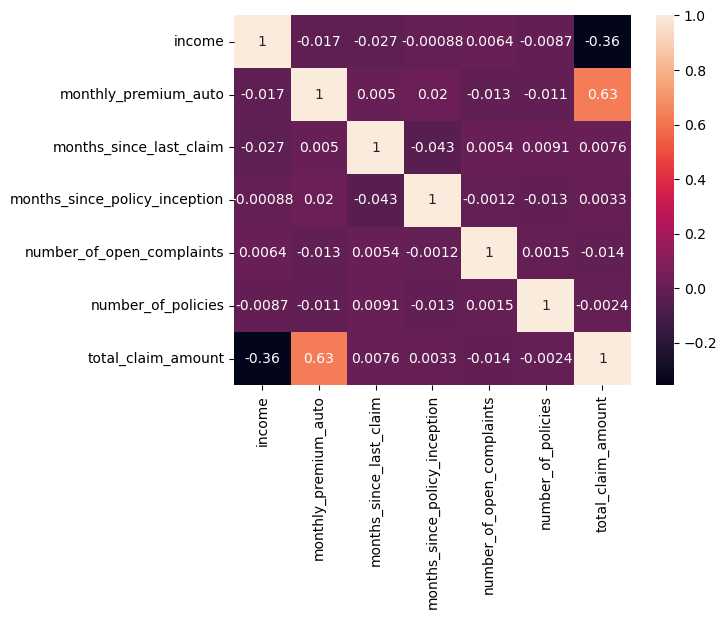

In [36]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##highest correlation between monthly premium auto and total claim amount
##Customers who pay higher premiums may be more likely to report and make claims for a number of reasons.
##some negative correlation between income and total claim amount

10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [37]:
def df_continuous_discrete(df: pd.DataFrame, threshold=36):
    continuous_cols = []
    discrete_cols = []
    
    for col in df.columns:
        unique_values = df[col].nunique()
        
        if unique_values <= threshold:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

continuous_df, discrete_df = df_continuous_discrete(numerical_df)

discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

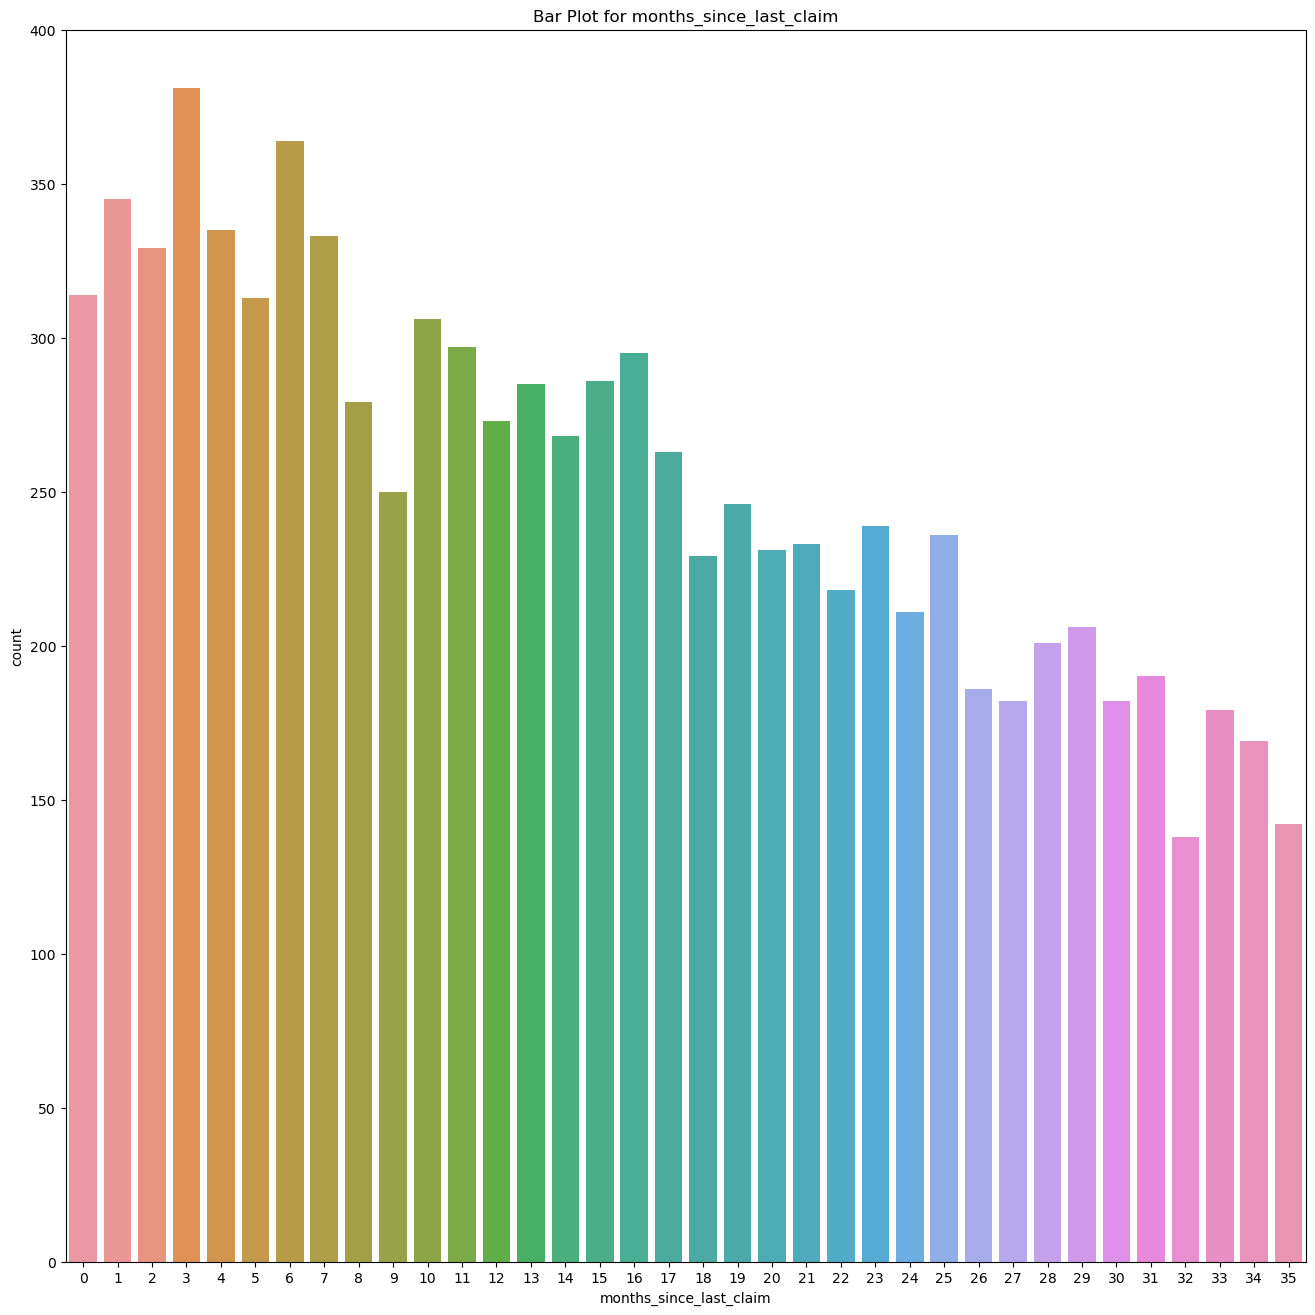

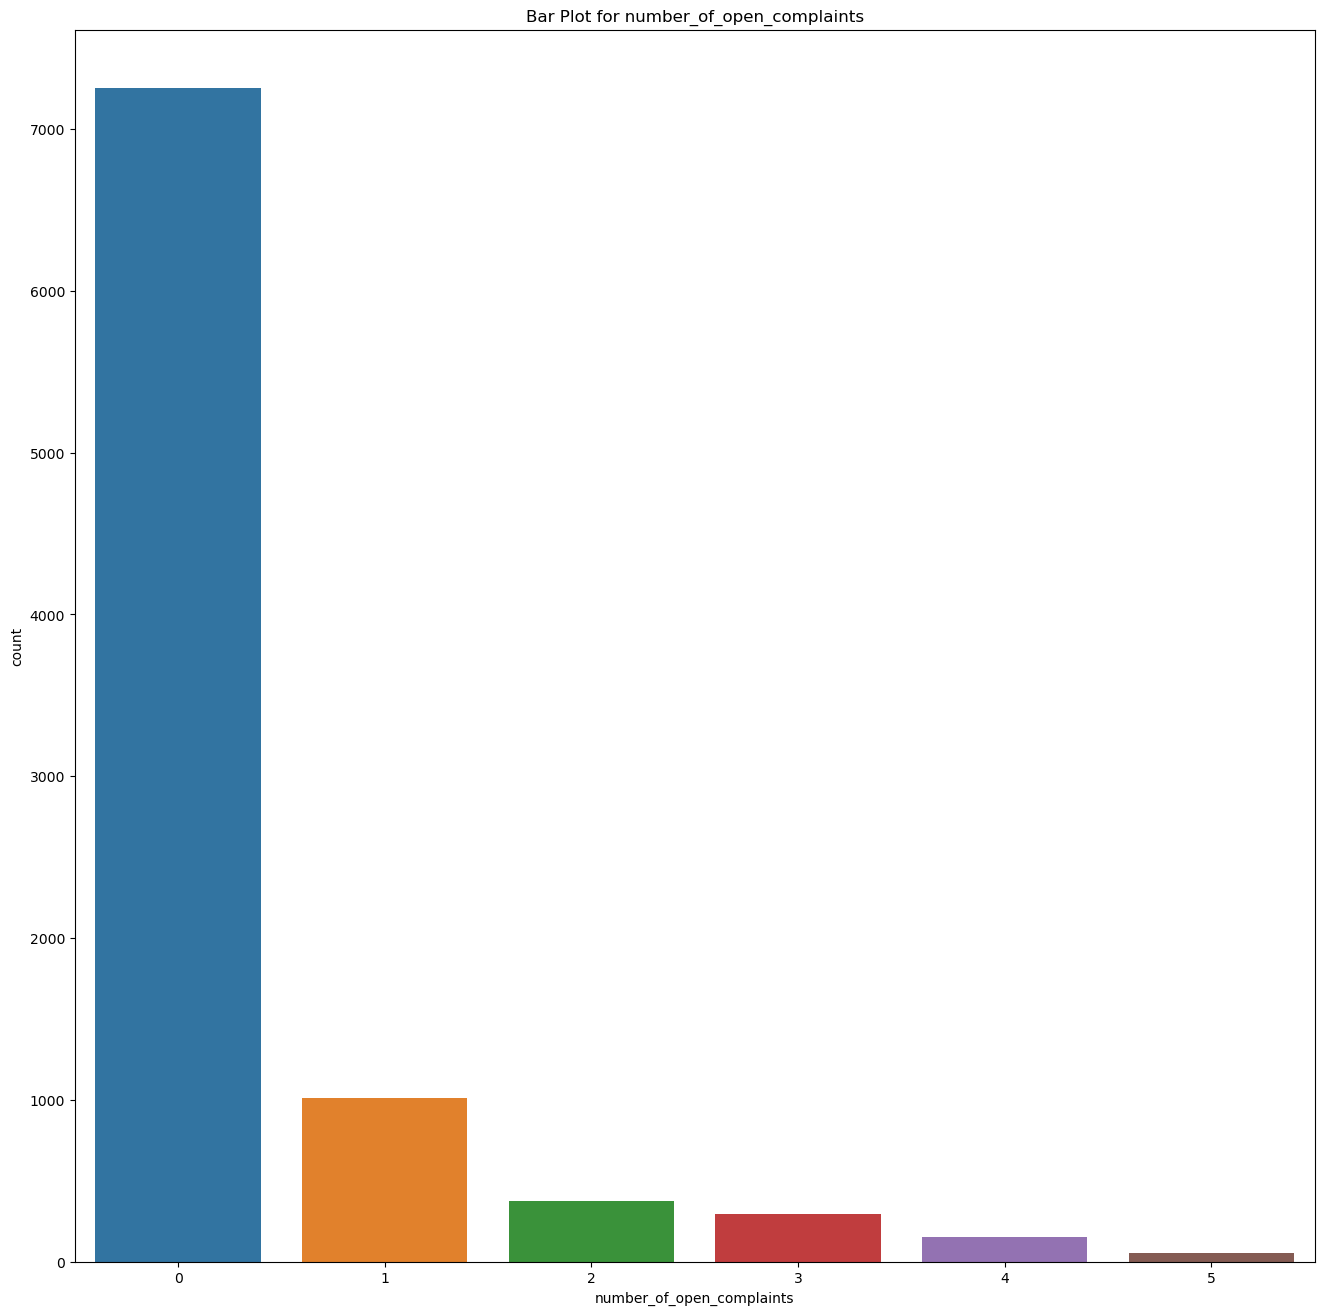

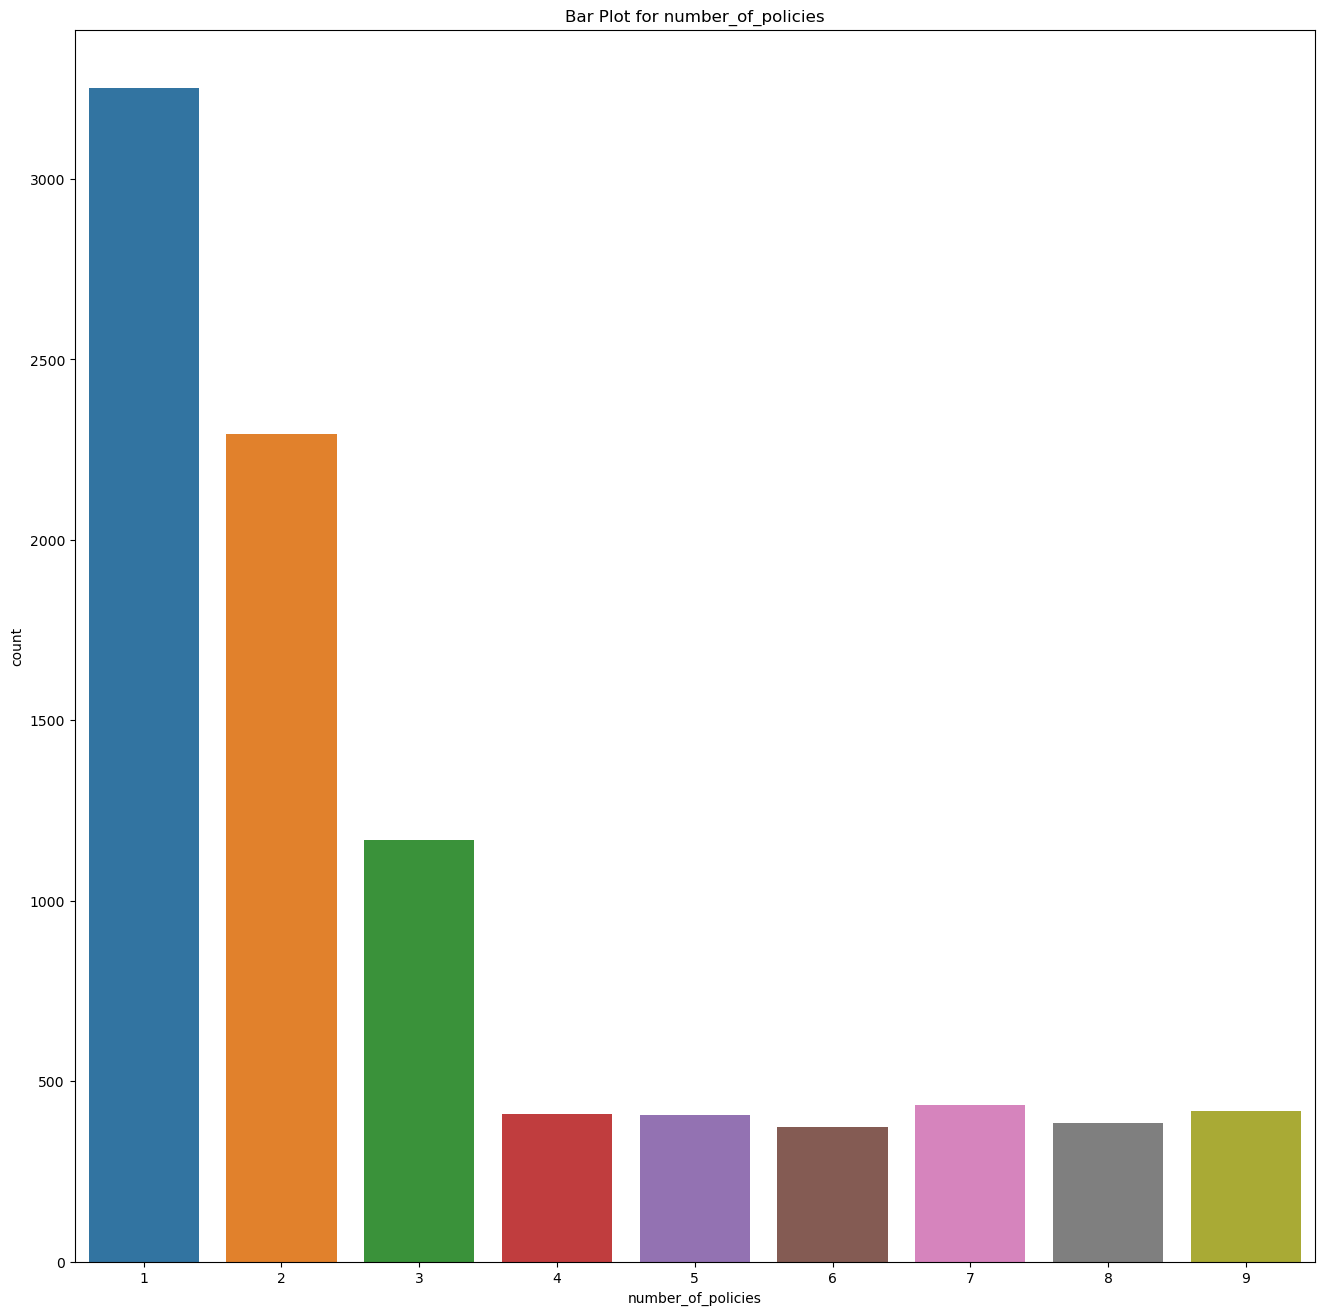

In [38]:
def plot_discrete(df):
    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Plot for {col}')
        plt.show()
        
        
plot_discrete(discrete_df)

12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

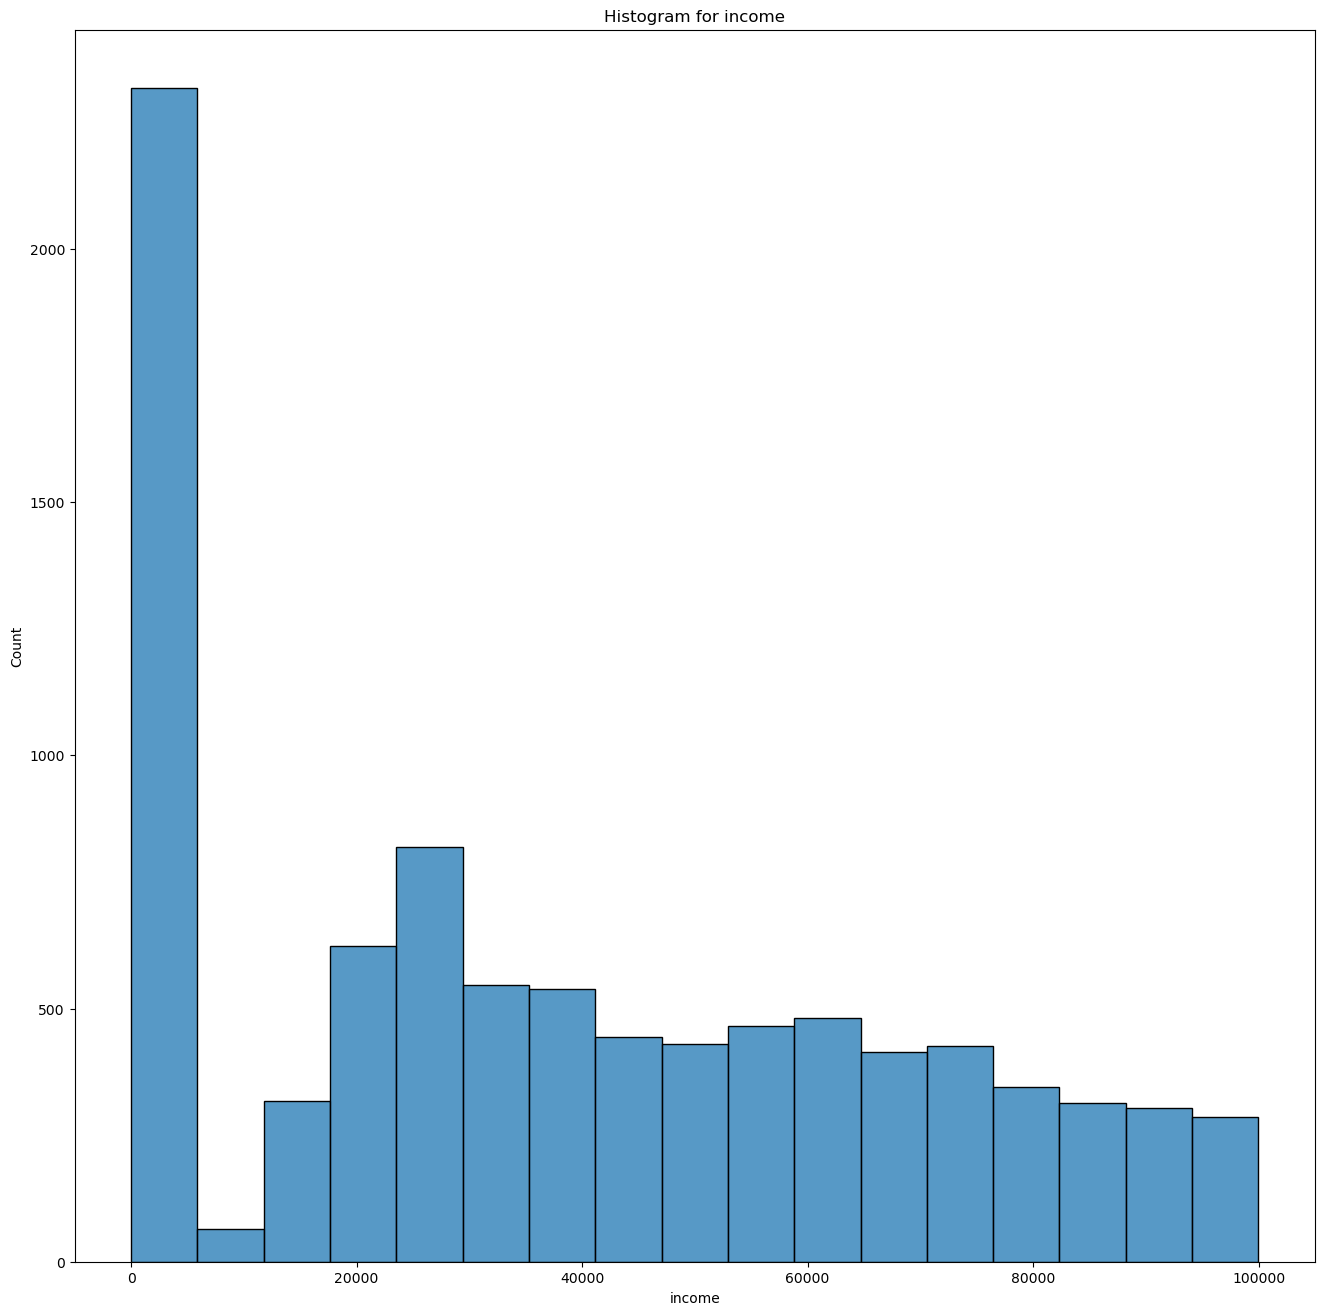

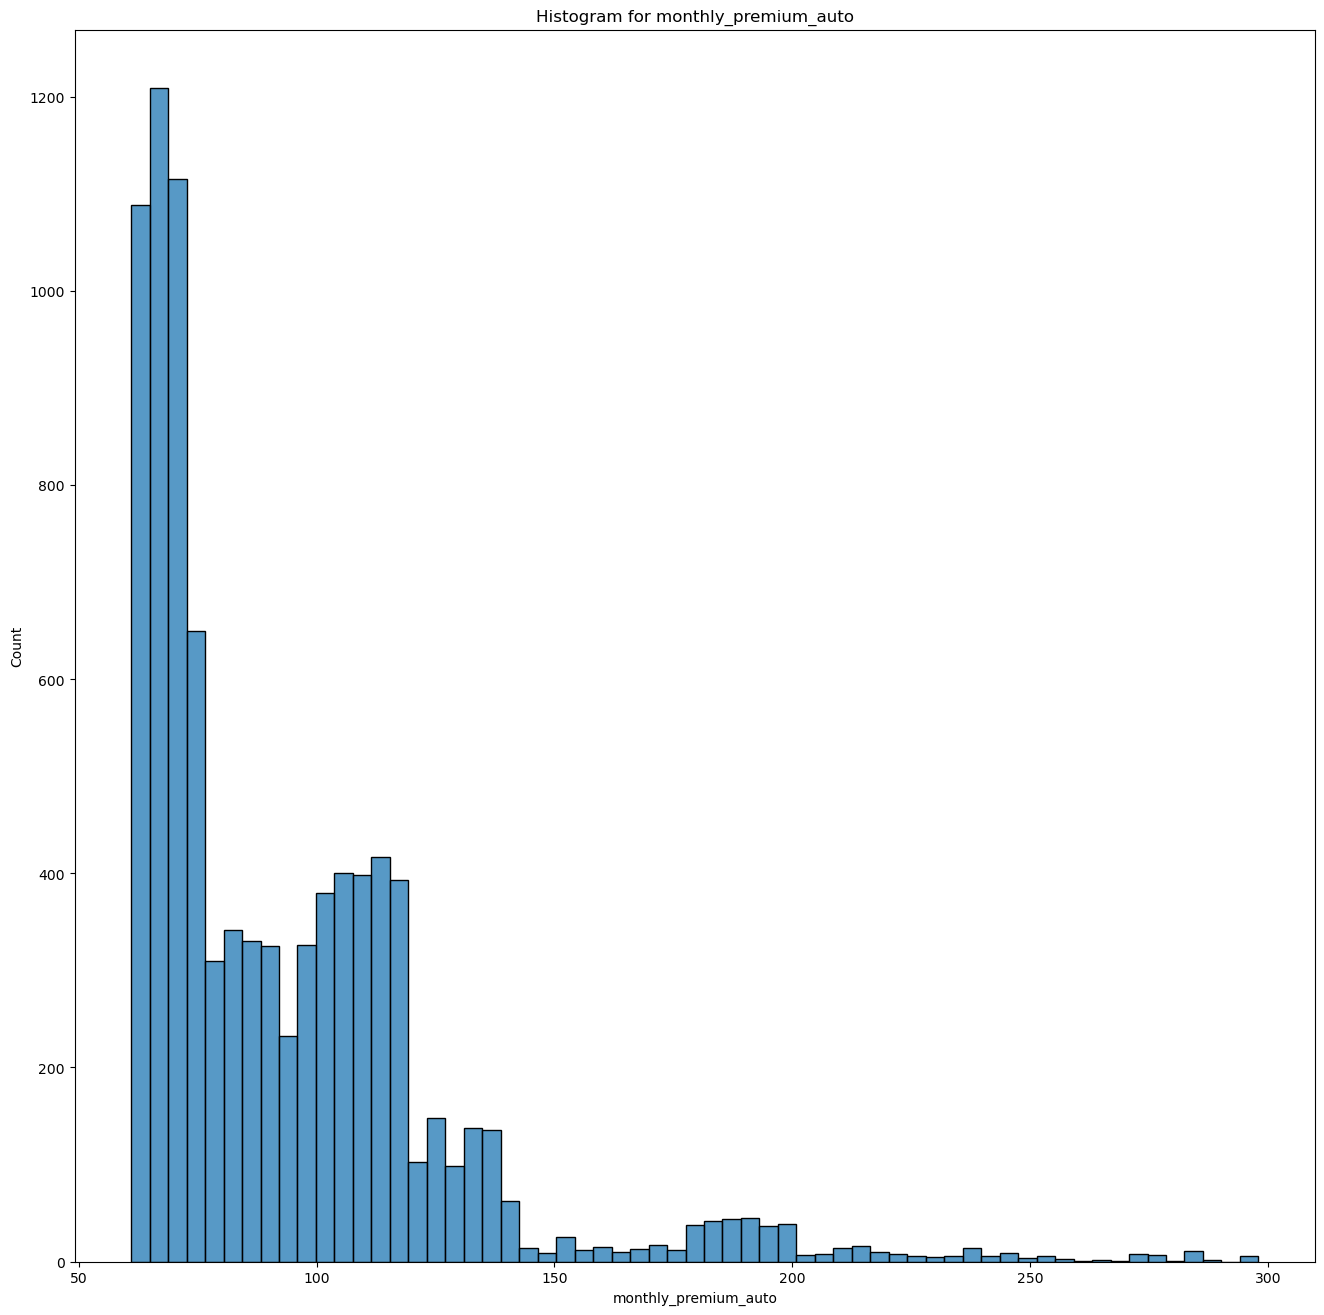

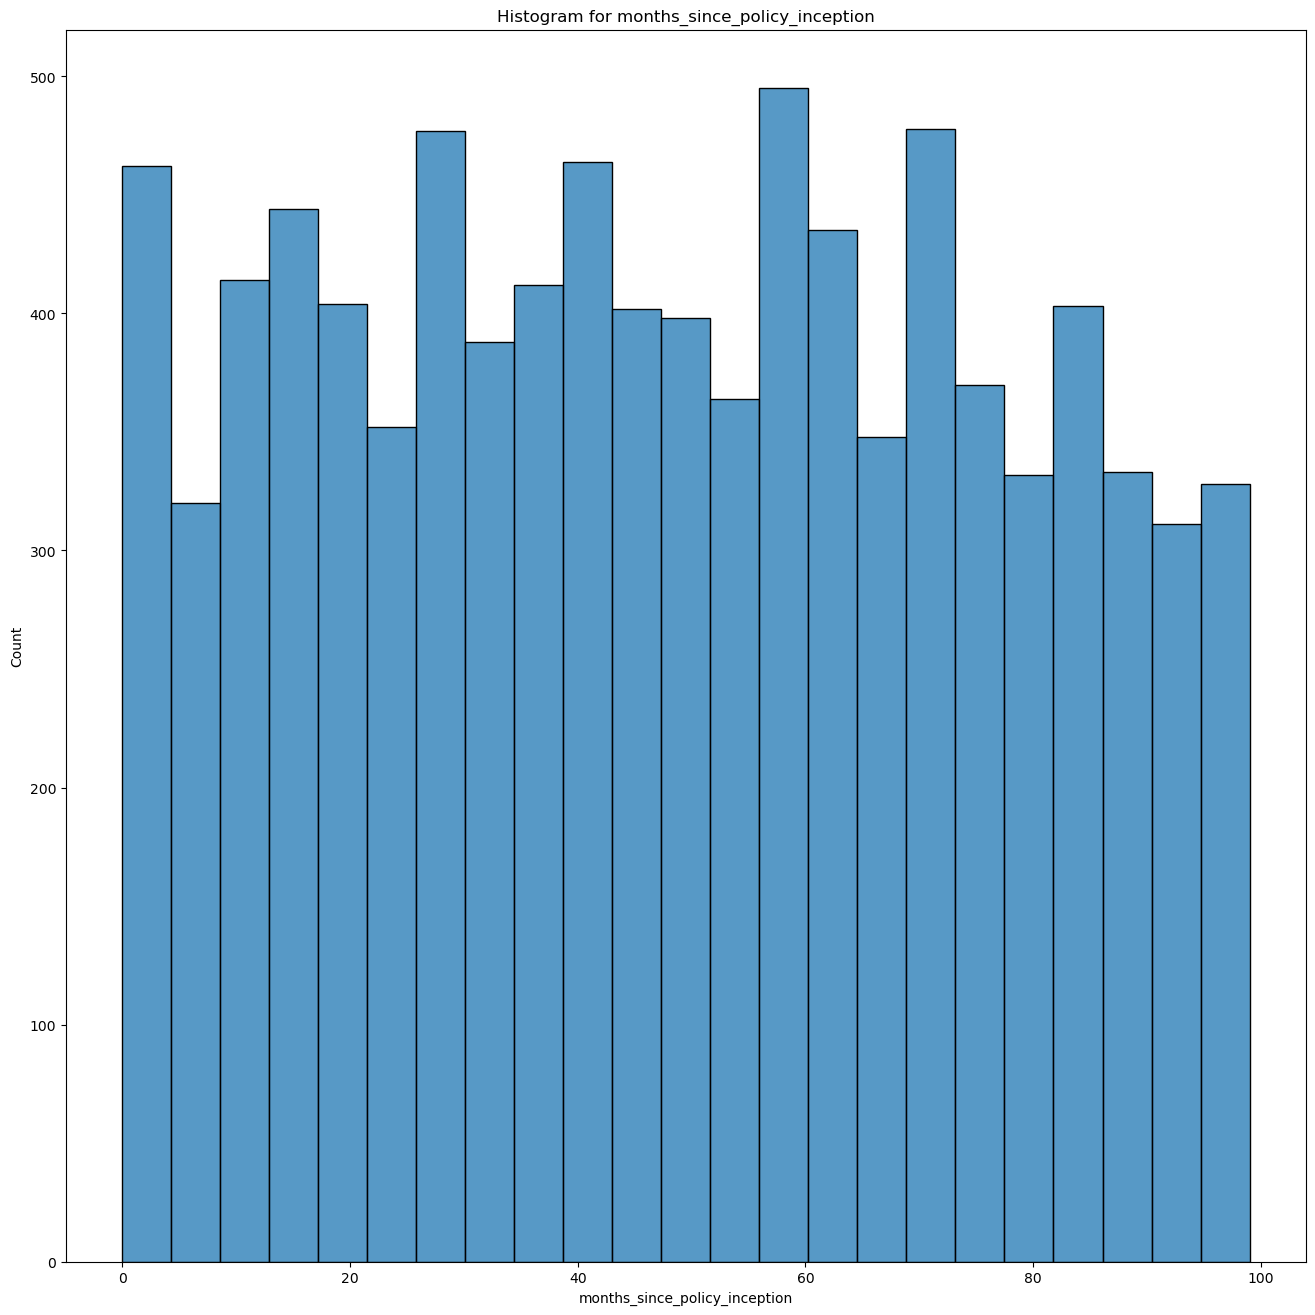

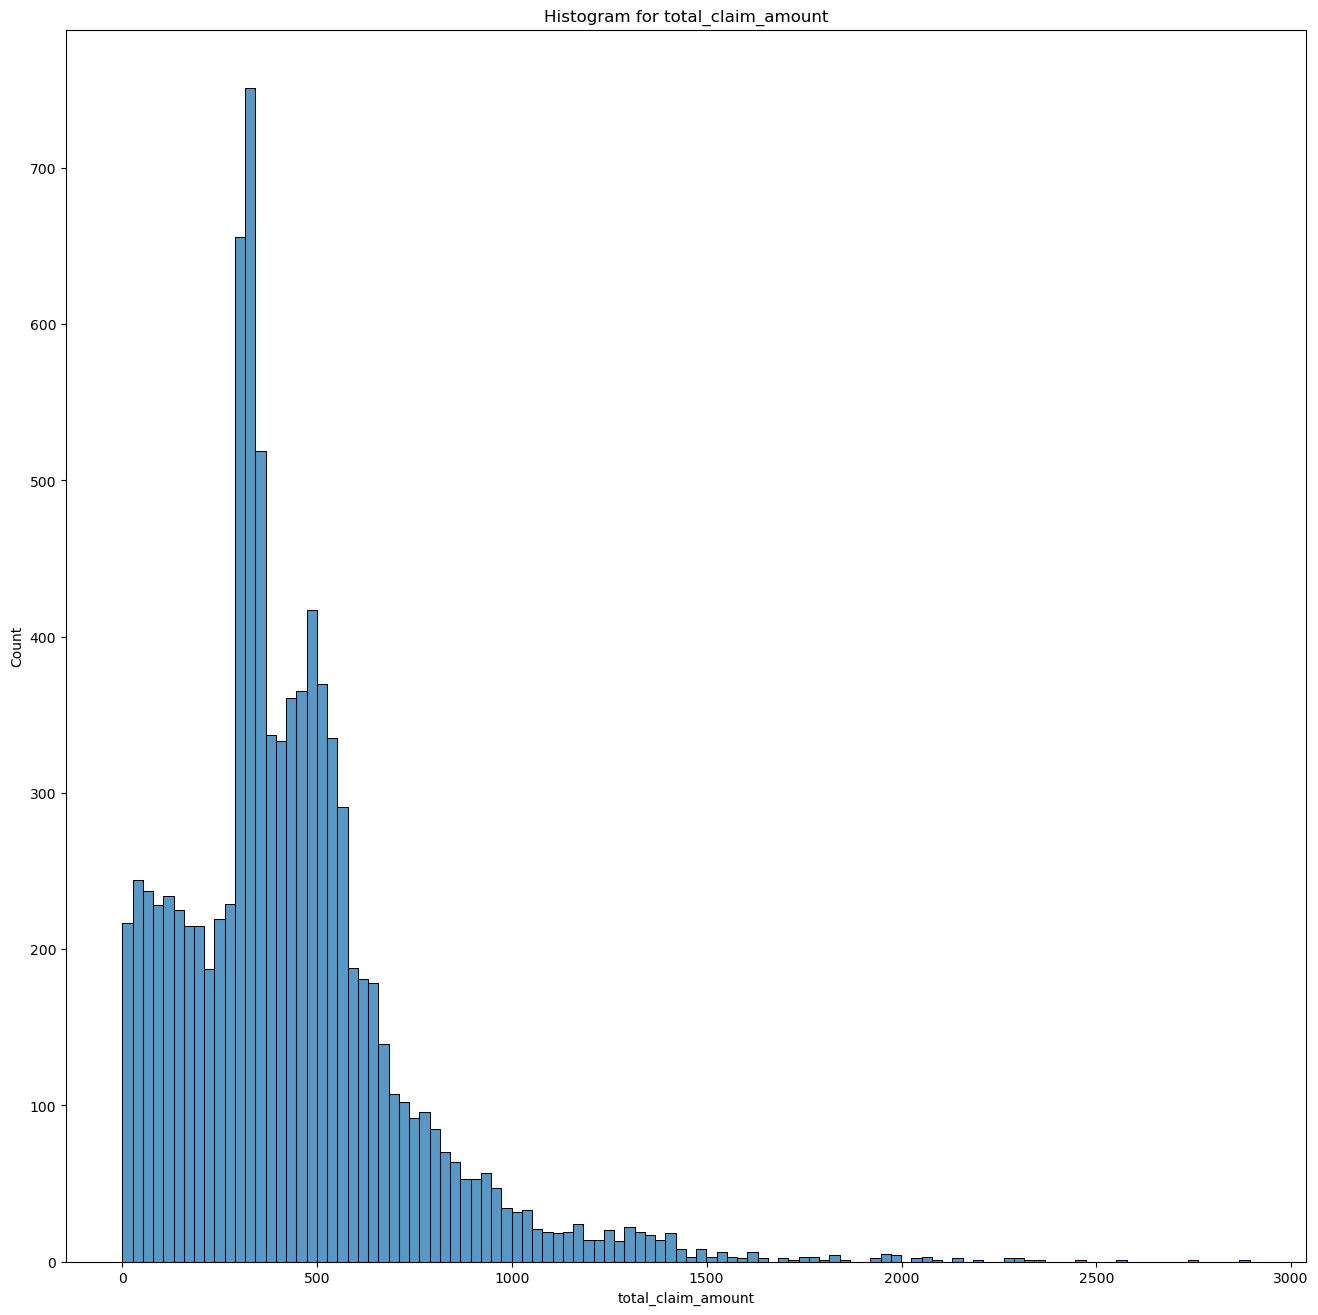

In [39]:
def hist_plot_continuous(df):
    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.histplot(data=df, x=col)
        plt.title(f'Histogram for {col}')
        plt.show()
        
        
hist_plot_continuous(continuous_df)

13.According to the previous histogram plots, do you think that you will have to apply any transformation?


- total_claim_amount seems to have a lot of outliers on the higher numbers and is skewed

- months_since_policy_inception seems to be quite evenly distributed

- monthly_premium auto seems to need transformation too

- income seems not to have outliers


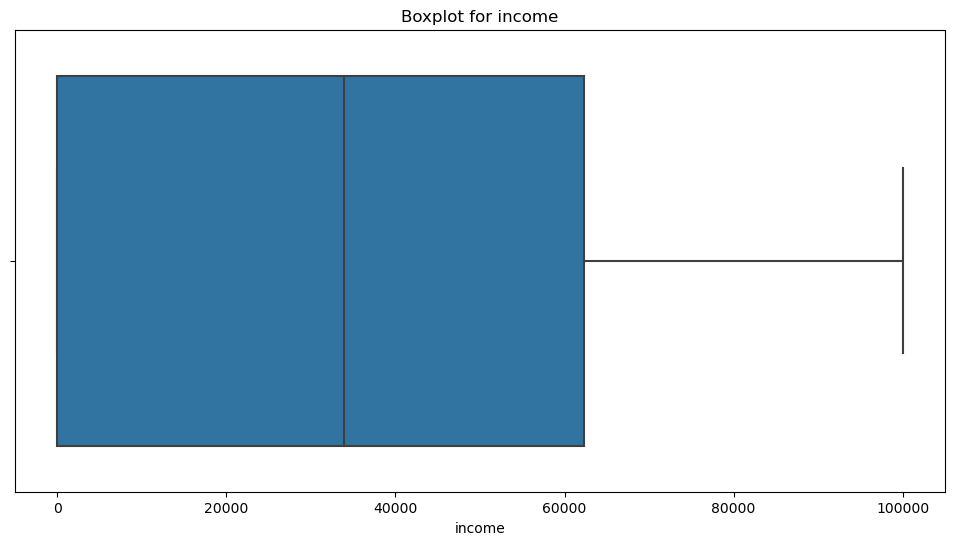

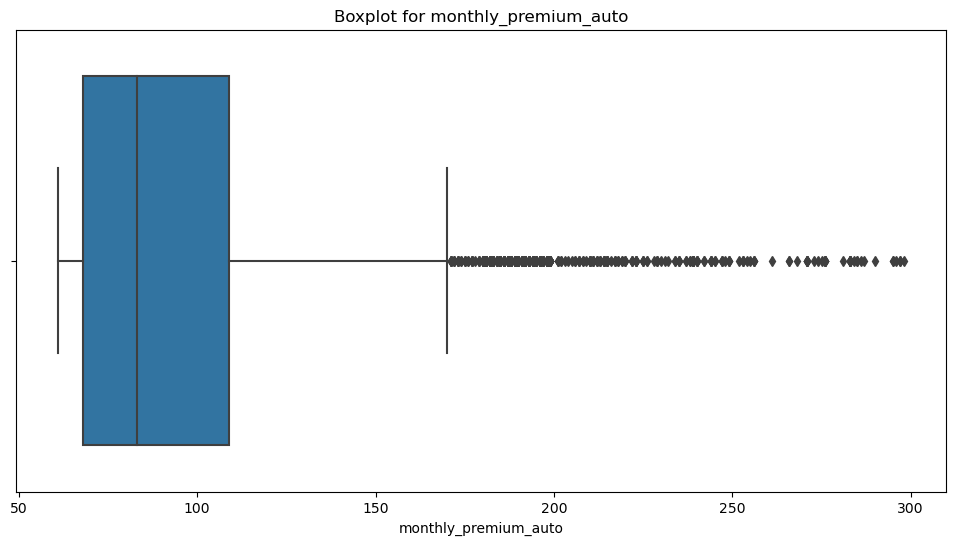

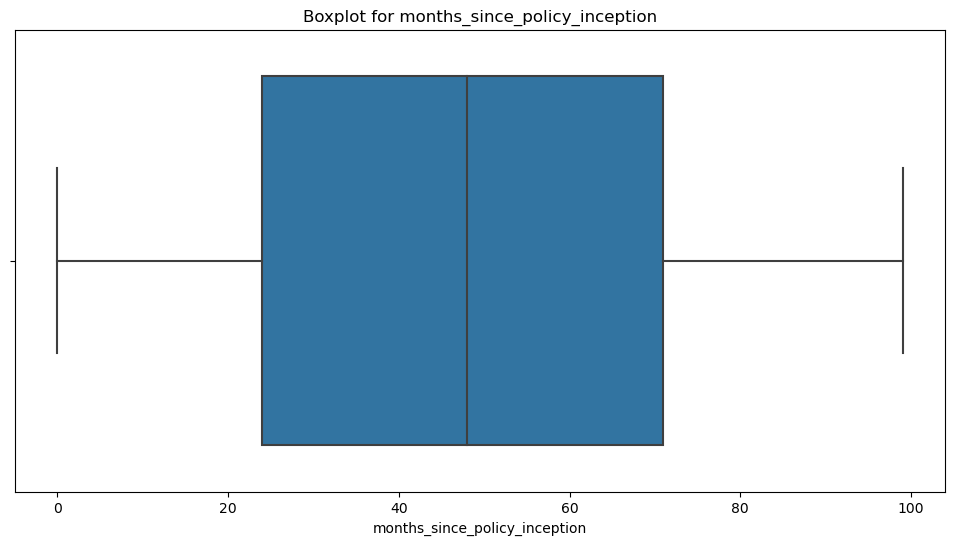

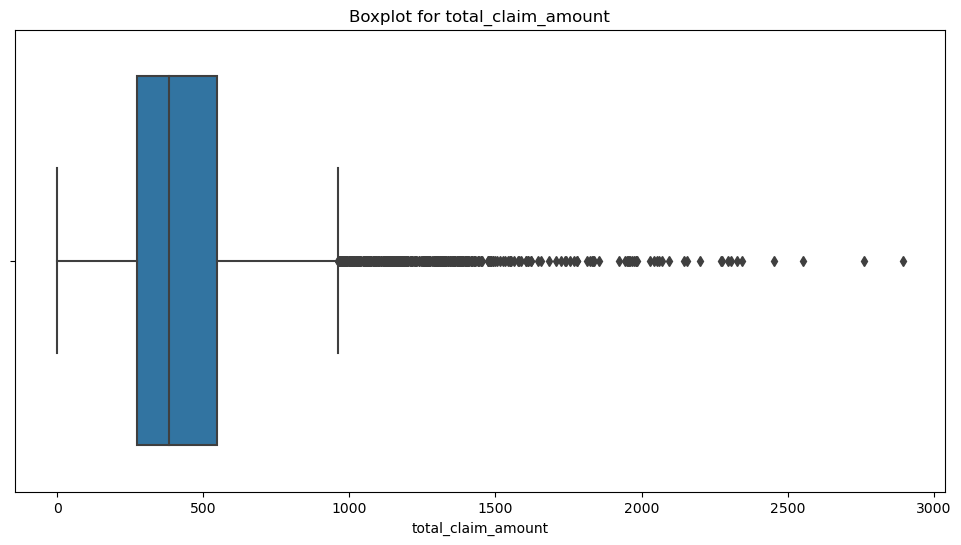

In [40]:
#14.Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

def box_plot_continuous(df):
    for col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()
        
        
box_plot_continuous(continuous_df)

Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.


Special instructions

As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named Lab Cleaning Categorical Data. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.

Instructions

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. 
Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

9. Plot the median "target" by day of the week name using a seaborn barplot

10. What can you conclude from this analysis?

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

12. Can you do a monthly analysis given the output of the previous series? Why?

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

17. Turn the response column values into (Yes=1/No=0).

18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

20. Deal with column Gender turning the values into (1/0).

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

26. Get a dataframe with the categorical nominal columns

27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [41]:
display(customer_df.head())

print(customer_df.shape)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,1970-01-01 00:00:00.000002763,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,1970-01-01 00:00:00.000006979,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,1970-01-01 00:00:00.000012887,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,1970-01-01 00:00:00.000007645,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,1970-01-01 00:00:00.000002813,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)


In [42]:
##Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column.
##Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). 
##In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [43]:
##I created a df with only the categorical already in the lab before (see above)

display(categorical_df.head())

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


def countplot_categorical(df: pd.DataFrame):
      for col in df.columns:
        plt.figure(figsize=(12, 6))
        order = df[col].value_counts().index
        
        if df[col].nunique() >= 6:
            sns.countplot(data=df, y=col, order=order)
        else:
            sns.countplot(data=df, x=col, order=order)
        plt.title(f'Countplot for {col}')
        plt.show()
        
        
countplot_categorical(categorical_df)

In [44]:
##policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with 
#an OneHotEncoder because we will increase a lot the number of columns in the dataframe. 
#Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [45]:
customer_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [46]:
categorical_df = categorical_df.drop(columns=['policy_type'])

In [47]:
customer_df = customer_df.drop(columns=['policy_type'])

In [48]:
def transform_policy_value(df, col_name='policy'):
    
    df.loc[df[col_name].isin(['Personal L1', 'Corporate L1', 'Special L1']), col_name] = 'L1'
    df.loc[df[col_name].isin(['Corporate L2', 'Personal L2', 'Special L2']), col_name] = 'L2'
    df.loc[df[col_name].isin(['Corporate L3', 'Personal L3', 'Special L3']), col_name] = 'L3'
    
    return df
    

transformed_cat_df = transform_policy_value(categorical_df, col_name='policy')

transformed_cat_df['policy'].unique()


array(['L3', 'L2', 'L1'], dtype=object)

In [49]:
transformed_df = transform_policy_value(customer_df, col_name='policy')

transformed_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,1970-01-01 00:00:00.000002763,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,1970-01-01 00:00:00.000006979,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,1970-01-01 00:00:00.000012887,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,1970-01-01 00:00:00.000007645,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,1970-01-01 00:00:00.000002813,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


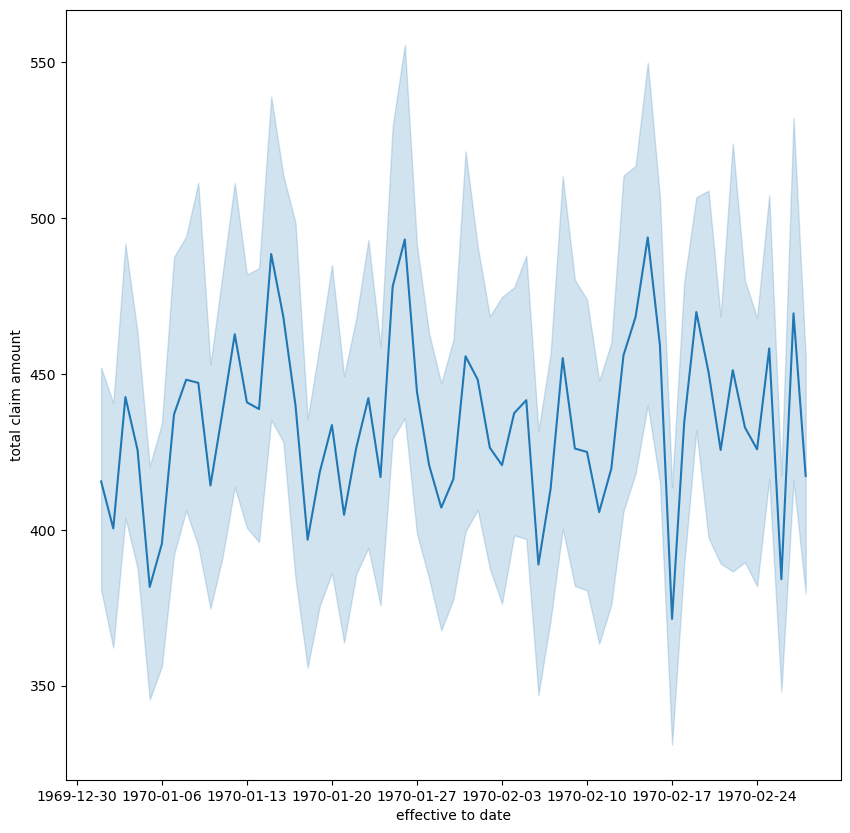

In [50]:
#Time dependency analysis. 
#Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. 
#Use a figsize=(10,10)

import matplotlib.dates as mdates

plt.figure(figsize=(10,10))
sns.lineplot(data=transformed_df, x='effective_to_date', y='total_claim_amount')
plt.xlabel('effective to date') 
plt.ylabel('total claim amount') 
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.show()

In [51]:
display(transformed_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,1970-01-01 00:00:00.000002763,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,1970-01-01 00:00:00.000006979,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,1970-01-01 00:00:00.000012887,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,1970-01-01 00:00:00.000007645,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,1970-01-01 00:00:00.000002813,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [52]:
transformed_df['effective_to_date'] = pd.to_datetime(transformed_df['effective_to_date'], errors='coerce')

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_3392/3174199936.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transformed_df['effective_to_date'] = pd.to_datetime(transformed_df['effective_to_date'], errors='coerce')


In [53]:
transformed_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value          datetime64[ns]
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [54]:
##To continue the analysis define an empty pandas DataFrame 
##and add the following new columns: 
##day with the day number of effective_to_date 
##day_name with the day NAME of effective_to_date 
##week with the week of effective_to_date 
##month with the month NAME of effective_to_date 
##total_claim_amount with total_claim_amount

effective_td_df = pd.DataFrame()

effective_td_df['day'] = transformed_df['effective_to_date'].dt.day
effective_td_df['day_name'] = transformed_df['effective_to_date'].dt.day_name()
effective_td_df['week'] = transformed_df['effective_to_date'].dt.isocalendar().week
effective_td_df['month'] = transformed_df['effective_to_date'].dt.month_name()
effective_td_df['total_claim_amount'] = transformed_df['total_claim_amount']

effective_td_df.head()


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [55]:
##Compute the total target column aggregated day_name rounded to two decimals 
##and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

target_series_day = effective_td_df.groupby('day_name')['total_claim_amount'].sum().round(2).reindex(index=list_of_correct_days)

target_series_day

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

<Axes: xlabel='day_name', ylabel='total_claim_amount'>

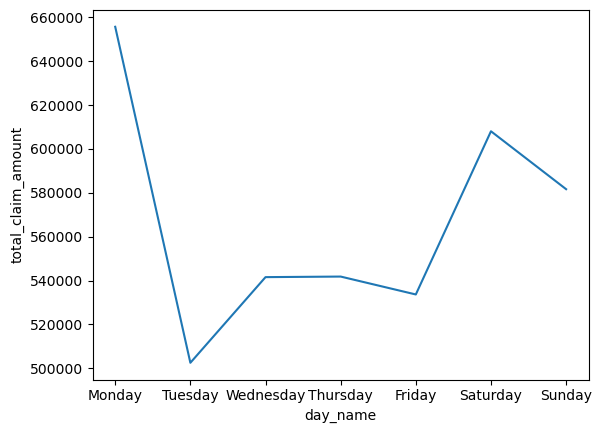

In [56]:
#Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

sns.lineplot(data=target_series_day)

##the total claim amount seems to be to lowest on Tuesday and the highest on Monday

In [57]:
#Get the total number of claims by day of the week name 
#and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

total_claims_by_day = effective_td_df.groupby('day_name')['total_claim_amount'].sum()

total_claims_by_day.reindex(index=list_of_correct_days)


day_name
Monday       655689.707832
Tuesday      502518.931456
Wednesday    541563.053203
Thursday     541820.798820
Friday       533658.793865
Saturday     608060.101874
Sunday       581655.660204
Name: total_claim_amount, dtype: float64

In [58]:
#Get the median "target" by day of the week name 
#and then sort the resulting values in descending order using .sort_values()

median_claims = effective_td_df.groupby('day_name')['total_claim_amount'].median().sort_values()

median_claims


day_name
Friday       371.803029
Tuesday      378.490829
Saturday     379.200000
Sunday       383.721164
Monday       385.735705
Wednesday    392.235698
Thursday     395.328407
Name: total_claim_amount, dtype: float64

In [59]:
##What can you conclude from this analysis?

In [60]:
#Compute the total target column aggregated month rounded to two decimals 
#and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

list_of_correct_values_months = ['January', 'February']

target_series_month = effective_td_df.groupby('month')['total_claim_amount'].sum().round(2)

target_series_month.reindex(index=list_of_correct_values_months)

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

In [61]:
#Can you do a monthly analysis given the output of the previous series? Why?

In [62]:
#Define a function to remove the outliers of a numerical continuous column depending 
#if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

def remove_outliers_num_con(df, column_name, thr=3):
  
    mean_value = df[column_name].mean()
    std_deviation = df[column_name].std()

    lower_bound = mean_value - thr * std_deviation
    upper_bound = mean_value + thr * std_deviation

    new_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return new_df


##Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
continuous_clean_df = remove_outliers_num_con(continuous_df, 'total_claim_amount', thr=3)
continuous_clean_df = remove_outliers_num_con(continuous_df, 'months_since_policy_inception', thr=3)
continuous_clean_df = remove_outliers_num_con(continuous_df, 'monthly_premium_auto', thr=3)

continuous_clean_df.head()

continuous_clean_df_drop = continuous_clean_df.drop(columns=['total_claim_amount'])

In [63]:
continuous_clean_df_drop.head()

,income,monthly_premium_auto,months_since_policy_inception
0,56274,69,5
1,0,94,42
2,48767,108,38
3,0,106,65
4,43836,73,44


In [64]:
##Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. 
##After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. 
##Use pd.dropna() and .reset_index() to fix the final dataframe.

# Resetting the indices before concatenation
continuous_clean_df_drop = continuous_clean_df_drop.reset_index(drop=True)
discrete_df = discrete_df.reset_index(drop=True)
categorical_df = categorical_df.reset_index(drop=True)
effective_td_df = effective_td_df.reset_index(drop=True)

final_df = pd.concat([continuous_clean_df_drop, discrete_df, categorical_df, effective_td_df], axis=1)

display(final_df.head())

print(final_df.shape)
print(final_df.isna().sum())


,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,0.0,106.0,65.0,18,0,7,WW63253,California,No,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


(9134, 26)
income                           200
monthly_premium_auto             200
months_since_policy_inception    200
months_since_last_claim            0
number_of_open_complaints          0
number_of_policies                 0
customer                           0
state                              0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
location_code                      0
marital_status                     0
policy                             0
renew_offer_type                   0
sales_channel                      0
vehicle_class                      0
vehicle_size                       0
day                                0
day_name                           0
week                               0
month                              0
total_claim_amount                 0
dtype: int64


In [65]:
final_df = final_df.dropna()

display(final_df.head())

print(final_df.shape)
print(final_df.isna().sum())

,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,0.0,106.0,65.0,18,0,7,WW63253,California,No,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


(8934, 26)
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
customer                         0
state                            0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
day                              0
day_name                         0
week                             0
month                            0
total_claim_amount               0
dtype: int64


In [66]:
##Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

##It already is the last column, still I will reorder

final_df = final_df.reindex(columns=['customer', 'state', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'income', 'monthly_premium_auto', 'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'day', 'day_name',
       'week', 'month', 'total_claim_amount'])


In [67]:
final_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,...,94.0,42.0,13,0,8,31,Monday,5,January,1131.464935
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879


In [68]:
#Turn the response column values into (Yes=1/No=0).

def change_response_value(df: pd.DataFrame, col_name: str):
    
    df.loc[df[col_name].isin(['Yes']), col_name] = '1'
    df.loc[df[col_name].isin(['No']), col_name] = '0'
    
    return df


final_df = change_response_value(final_df, 'response')

display(final_df.head())

final_df['response'].unique()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,BU79786,Washington,0,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,QZ44356,Arizona,0,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,...,94.0,42.0,13,0,8,31,Monday,5,January,1131.464935
2,AI49188,Nevada,0,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
3,WW63253,California,0,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
4,HB64268,Washington,0,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879


array(['0', '1'], dtype=object)

In [69]:
#Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" 
#while keeping the other possible values as they are. 
#In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

final_df['education'].unique()

def group_graduate(df, col_name='education'):
    
    df.loc[df[col_name].isin(['Bachelor', 'Master', 'Special L1']), col_name] = 'Graduate'
    
    return df
    
    
final_df = group_graduate(final_df)

final_df['education'].unique()


array(['Graduate', 'College', 'High School or Below', 'Doctor'],
      dtype=object)

In [70]:
#Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. 
#In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


def group_employmentstatus(df, col_name='employmentstatus'):
    
    df.loc[df[col_name].isin(["Medical Leave", "Disabled", "Retired"]), col_name] = 'Inactive'
    
    return df
    
    
final_df = group_employmentstatus(final_df)

final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [71]:
#Deal with column Gender turning the values into (1/0).

def change_gender_value(df: pd.DataFrame, col_name: str):
    
    df.loc[df[col_name].isin(['F']), col_name] = '1'
    df.loc[df[col_name].isin(['M']), col_name] = '0'
    
    return df


final_df = change_gender_value(final_df, 'gender')

display(final_df.head())

final_df['gender'].unique()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,BU79786,Washington,0,Basic,Graduate,2/24/11,Employed,1,Suburban,Married,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,QZ44356,Arizona,0,Extended,Graduate,1/31/11,Unemployed,1,Suburban,Single,...,94.0,42.0,13,0,8,31,Monday,5,January,1131.464935
2,AI49188,Nevada,0,Premium,Graduate,2/19/11,Employed,1,Suburban,Married,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
3,WW63253,California,0,Basic,Graduate,1/20/11,Unemployed,0,Suburban,Married,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
4,HB64268,Washington,0,Basic,Graduate,2/3/11,Employed,0,Rural,Single,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879


array(['1', '0'], dtype=object)

In [72]:
final_df['gender'].unique()

array(['1', '0'], dtype=object)

In [73]:
#Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. 
#In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


def group_vehicle(df, col_name='vehicle_class'):
    
    df.loc[df[col_name].isin(['Luxury SUV', 'Sports Car', 'Luxury Car']), col_name] = 'Luxury'
    
    return df
    
    
final_df = group_vehicle(final_df)

In [74]:
final_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [75]:
#Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering. 
#Encode the coverage: "Premium" > "Extended" > "Basic".

from sklearn.preprocessing import OrdinalEncoder

coverage_order = ['Basic', 'Extended', 'Premium']

encoder = OrdinalEncoder(categories=[coverage_order])

final_df['coverage_encoded'] = encoder.fit_transform(final_df[['coverage']])

#Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

employment_order = ['Unemployed', 'Inactive', 'Employed']

encoder = OrdinalEncoder(categories=[employment_order])

final_df['employment_encoded'] = encoder.fit_transform(final_df[['employmentstatus']])

#Encode the column location_code as: "Urban" > "Suburban" > "Rural".

location_order = ['Rural', 'Suburban', 'Urban']

encoder = OrdinalEncoder(categories=[location_order])

final_df['location_encoded'] = encoder.fit_transform(final_df[['location_code']])

#Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

vehicle_order = ['Small', 'Medsize', 'Large']

encoder = OrdinalEncoder(categories=[vehicle_order])

final_df['vehicle_encoded'] = encoder.fit_transform(final_df[['vehicle_size']])

final_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,number_of_policies,day,day_name,week,month,total_claim_amount,coverage_encoded,employment_encoded,location_encoded,vehicle_encoded
0,BU79786,Washington,0,Basic,Graduate,2/24/11,Employed,1,Suburban,Married,...,1,24,Thursday,8,February,384.811147,0.0,2.0,1.0,1.0
1,QZ44356,Arizona,0,Extended,Graduate,1/31/11,Unemployed,1,Suburban,Single,...,8,31,Monday,5,January,1131.464935,1.0,0.0,1.0,1.0
2,AI49188,Nevada,0,Premium,Graduate,2/19/11,Employed,1,Suburban,Married,...,2,19,Saturday,7,February,566.472247,2.0,2.0,1.0,1.0
3,WW63253,California,0,Basic,Graduate,1/20/11,Unemployed,0,Suburban,Married,...,7,20,Thursday,3,January,529.881344,0.0,0.0,1.0,1.0
4,HB64268,Washington,0,Basic,Graduate,2/3/11,Employed,0,Rural,Single,...,1,3,Thursday,5,February,138.130879,0.0,2.0,0.0,1.0


In [76]:
#Get a dataframe with the categorical nominal columns


cat_nom_columns = ['coverage_encoded', 'employment_encoded', 'location_encoded', 'vehicle_encoded']

cat_nom_df = final_df[cat_nom_columns]

cat_nom_df.head()

,coverage_encoded,employment_encoded,location_encoded,vehicle_encoded
0,0.0,2.0,1.0,1.0
1,1.0,0.0,1.0,1.0
2,2.0,2.0,1.0,1.0
3,0.0,0.0,1.0,1.0
4,0.0,2.0,0.0,1.0


In [77]:
#Create a list of named levels which that has as many elements as categorical nominal columns. 
#Each element must be another list with all the possible unique values of the corresponding categorical nominal column

cat_nom_columns = ['coverage_encoded', 'employment_encoded', 'location_encoded', 'vehicle_encoded']

levels = []

for col in cat_nom_columns:
    unique_values = final_df[col].unique().tolist()
    levels.append(unique_values)

print(levels)


[[0.0, 1.0, 2.0], [2.0, 0.0, 1.0], [1.0, 0.0, 2.0], [1.0, 0.0, 2.0]]


In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories='auto')

encoded_data = encoder.fit_transform(cat_nom_df)

print(encoded_data)

  (0, 3)	1.0
  (0, 4)	1.0
  (0, 6)	1.0
  (1, 0)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 4)	1.0
  (2, 6)	1.0
  (3, 4)	1.0
  (3, 6)	1.0
  (4, 3)	1.0
  (4, 6)	1.0
  (5, 3)	1.0
  (5, 6)	1.0
  (6, 3)	1.0
  (6, 4)	1.0
  (6, 6)	1.0
  (7, 1)	1.0
  (7, 5)	1.0
  (7, 6)	1.0
  (8, 2)	1.0
  (8, 4)	1.0
  (8, 6)	1.0
  :	:
  (8925, 3)	1.0
  (8926, 1)	1.0
  (8926, 2)	1.0
  (8926, 4)	1.0
  (8926, 6)	1.0
  (8927, 2)	1.0
  (8927, 4)	1.0
  (8927, 6)	1.0
  (8928, 0)	1.0
  (8928, 3)	1.0
  (8928, 4)	1.0
  (8928, 7)	1.0
  (8929, 4)	1.0
  (8929, 6)	1.0
  (8930, 3)	1.0
  (8930, 6)	1.0
  (8931, 3)	1.0
  (8931, 4)	1.0
  (8931, 6)	1.0
  (8932, 1)	1.0
  (8932, 3)	1.0
  (8933, 0)	1.0
  (8933, 3)	1.0
  (8933, 5)	1.0
  (8933, 6)	1.0
